In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score


from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour

import warnings
warnings.filterwarnings("ignore")

models = []

In [30]:
Data = pd.read_csv("data/All_Star_Data.csv")
Data.pop(Data.columns[0])
Data

,Unnamed: 0.1,2P,2P%,2PA,3P,3P%,3PA,3PAr,AST,AST%,...,TRB,TRB%,TS%,Tm,USG%,VORP,WS,WS/48,eFG%,All_Star
0,0,2.0,0.494,4.0,0.3,0.300,0.9,0.181,1.0,8.7,...,4.4,13.5,0.533,NYK,15.5,-0.3,1.7,0.063,0.486,False
1,1,0.8,0.410,2.0,0.3,0.400,0.8,0.291,0.5,10.1,...,0.9,6.4,0.489,MEM,20.4,0.2,0.4,0.073,0.465,False
2,2,3.1,0.547,5.7,0.0,0.000,0.0,0.005,0.9,5.5,...,7.5,15.8,0.549,OKC,14.3,0.3,4.1,0.111,0.544,False
3,3,1.1,0.432,2.6,0.0,0.000,0.0,0.000,0.9,10.5,...,4.5,20.5,0.494,MIN,14.3,0.0,0.4,0.087,0.432,False
4,4,3.3,0.466,7.1,1.5,0.354,4.3,0.377,1.7,8.2,...,3.2,5.3,0.533,TOT,19.0,-0.3,2.6,0.050,0.491,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3588,535,2.8,0.509,5.5,1.0,0.372,2.7,0.332,4.4,23.0,...,4.3,8.6,0.562,TOT,16.3,1.8,4.3,0.117,0.525,False
3589,536,5.3,0.580,9.1,0.2,0.267,0.7,0.068,4.3,27.1,...,6.2,14.2,0.578,CHI,22.3,2.2,5.1,0.147,0.568,False
3590,537,5.6,0.491,11.3,2.2,0.343,6.3,0.357,9.4,45.5,...,3.9,6.3,0.589,ATL,33.0,3.0,7.2,0.163,0.499,False
3591,538,3.7,0.598,6.2,0.1,0.143,0.6,0.086,1.8,13.2,...,6.8,17.7,0.599,CHO,18.3,0.4,3.3,0.156,0.565,False


In [31]:
Data['Player']

0           Quincy Acy
1         Jordan Adams
2         Steven Adams
3          Jeff Adrien
4        Arron Afflalo
             ...      
3588      Delon Wright
3589    Thaddeus Young
3590        Trae Young
3591       Cody Zeller
3592       Ivica Zubac
Name: Player, Length: 3593, dtype: object

## Player column is a string variable, so i had to drop it from my dataframe.

In [32]:
Data = Data.drop(labels=['Player'], axis=1)
Data

,Unnamed: 0.1,2P,2P%,2PA,3P,3P%,3PA,3PAr,AST,AST%,...,TRB,TRB%,TS%,Tm,USG%,VORP,WS,WS/48,eFG%,All_Star
0,0,2.0,0.494,4.0,0.3,0.300,0.9,0.181,1.0,8.7,...,4.4,13.5,0.533,NYK,15.5,-0.3,1.7,0.063,0.486,False
1,1,0.8,0.410,2.0,0.3,0.400,0.8,0.291,0.5,10.1,...,0.9,6.4,0.489,MEM,20.4,0.2,0.4,0.073,0.465,False
2,2,3.1,0.547,5.7,0.0,0.000,0.0,0.005,0.9,5.5,...,7.5,15.8,0.549,OKC,14.3,0.3,4.1,0.111,0.544,False
3,3,1.1,0.432,2.6,0.0,0.000,0.0,0.000,0.9,10.5,...,4.5,20.5,0.494,MIN,14.3,0.0,0.4,0.087,0.432,False
4,4,3.3,0.466,7.1,1.5,0.354,4.3,0.377,1.7,8.2,...,3.2,5.3,0.533,TOT,19.0,-0.3,2.6,0.050,0.491,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3588,535,2.8,0.509,5.5,1.0,0.372,2.7,0.332,4.4,23.0,...,4.3,8.6,0.562,TOT,16.3,1.8,4.3,0.117,0.525,False
3589,536,5.3,0.580,9.1,0.2,0.267,0.7,0.068,4.3,27.1,...,6.2,14.2,0.578,CHI,22.3,2.2,5.1,0.147,0.568,False
3590,537,5.6,0.491,11.3,2.2,0.343,6.3,0.357,9.4,45.5,...,3.9,6.3,0.589,ATL,33.0,3.0,7.2,0.163,0.499,False
3591,538,3.7,0.598,6.2,0.1,0.143,0.6,0.086,1.8,13.2,...,6.8,17.7,0.599,CHO,18.3,0.4,3.3,0.156,0.565,False


In [33]:
Data.corr()

,Unnamed: 0.1,2P,2P%,2PA,3P,3P%,3PA,3PAr,AST,AST%,...,TOV%,TRB,TRB%,TS%,USG%,VORP,WS,WS/48,eFG%,All_Star
Unnamed: 0.1,1.000000,-0.016635,-0.002687,-0.012928,-0.031220,0.010149,-0.029910,0.001483,0.018411,0.026901,...,-0.005428,-0.060953,-0.039494,-0.011383,0.018722,-0.038651,-0.060844,-0.014369,-0.005625,-0.014445
2P,-0.016635,1.000000,0.287142,0.981622,0.287531,0.091866,0.294787,-0.374452,0.593533,0.369234,...,-0.074634,0.744094,0.208437,0.306387,0.616357,0.671151,0.720888,0.359669,0.263386,0.492073
2P%,-0.002687,0.287142,1.000000,0.177876,0.000777,-0.043017,-0.006869,-0.236102,0.041025,-0.017568,...,-0.036134,0.315588,0.230165,0.665058,0.018514,0.197648,0.285777,0.480515,0.694702,0.067622
2PA,-0.012928,0.981622,0.177876,1.000000,0.326966,0.124509,0.338953,-0.345616,0.635474,0.414650,...,-0.076370,0.692457,0.141619,0.226836,0.656706,0.632553,0.668628,0.291903,0.174095,0.483224
3P,-0.031220,0.287531,0.000777,0.326966,1.000000,0.548676,0.981485,0.546828,0.495495,0.297452,...,-0.198228,0.123688,-0.355281,0.227447,0.377737,0.424480,0.389613,0.159024,0.199841,0.299510
3P%,0.010149,0.091866,-0.043017,0.124509,0.548676,1.000000,0.503855,0.495611,0.261847,0.227352,...,-0.163462,-0.036707,-0.376069,0.320776,0.155444,0.150514,0.146132,0.204259,0.311769,0.091512
3PA,-0.029910,0.294787,-0.006869,0.338953,0.981485,0.503855,1.000000,0.571991,0.520599,0.321606,...,-0.194928,0.119112,-0.372231,0.152561,0.403669,0.400642,0.355292,0.094649,0.121218,0.296235
3PAr,0.001483,-0.374452,-0.236102,-0.345616,0.546828,0.495611,0.571991,1.000000,0.012464,0.007173,...,-0.169573,-0.362723,-0.522412,-0.083952,-0.079978,-0.086848,-0.155054,-0.189214,-0.069539,-0.048019
AST,0.018411,0.593533,0.041025,0.635474,0.495495,0.261847,0.520599,0.012464,1.000000,0.850392,...,0.128581,0.312286,-0.188748,0.130836,0.468497,0.597670,0.520672,0.196942,0.077239,0.447362
AST%,0.026901,0.369234,-0.017568,0.414650,0.297452,0.227352,0.321606,0.007173,0.850392,1.000000,...,0.184828,0.069633,-0.242378,0.062810,0.442902,0.403657,0.275886,0.144005,0.018050,0.321559


## Machine Learning proccess

In [34]:
Data.mean()

Unnamed: 0.1    256.774840
2P                2.320930
2P%               0.487020
2PA               4.611689
3P                0.824186
3P%               0.282580
3PA               2.351517
3PAr              0.338014
AST               1.877178
AST%             13.121514
Age              26.074311
BLK               0.395603
BLK%              1.723184
BPM              -1.467715
DBPM             -0.164459
DRB               2.732730
DRB%             15.161147
DWS               1.131172
FG                3.144086
FG%               0.441157
FGA               6.961620
FT                1.375146
FT%               0.708344
FTA               1.810576
FTr               0.261532
G                48.942666
GS               23.069858
MP               19.717451
OBPM             -1.302199
ORB               0.838519
ORB%              4.951879
OWS               1.217896
PER              13.024464
PF                1.699666
PTS               8.484052
Rk              257.774840
STL               0.628249
S

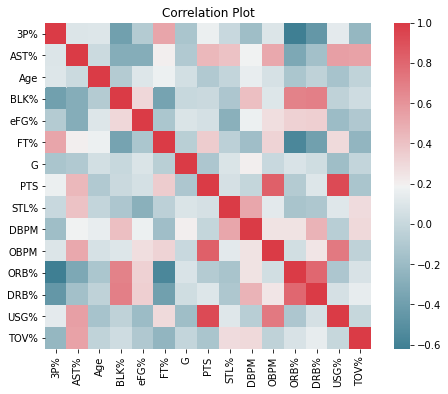

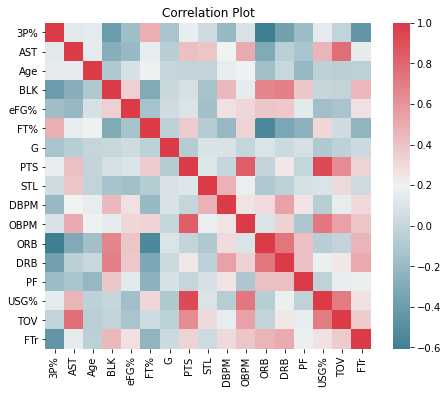

In [35]:
Data = Data.query('GS > 38.15 & MP > 29.415')

stats_pct = ['3P%', 'AST%', 'Age', 'BLK%', 'eFG%', 'FT%', 
                    'G', 'PTS', 'STL%', 'DBPM', 'OBPM',
                    'ORB%', 'DRB%', 'USG%', 'TOV%']
# and the per game numbers
stats_pg = ['3P%', 'AST', 'Age', 'BLK', 'eFG%', 'FT%', 
                    'G',  'PTS', 'STL', 'DBPM', 
                  'OBPM', 'ORB', 'DRB', 'PF',  'USG%', 'TOV', 'FTr']
x = Data[stats_pct]
y = Data['All_Star']
y = np.asarray(y,dtype=np.bool)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

x_pg = Data[stats_pg]
x_pg_train, x_pg_test, y_pg_train, y_pg_test = train_test_split(x_pg, y, test_size=0.4)

# Check predictor correlation 
cor = x_train.corr(method='pearson')
ig, ax = plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

# Check PG predictor correlation
cor = x_pg_train.corr(method='pearson')
ig, ax = plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [36]:
fs = 0
ts = 0
for y in y_train:
    if y:
        ts += 1
    else:
        fs += 1
        
print("all star to non all star ratio:" + str(ts/fs))
sm = RandomUnderSampler(sampling_strategy=0.5)
x_train, y_train = sm.fit_resample(x_train, y_train)
x_pg_train, y_pg_train = sm.fit_resample(x_pg_train, y_pg_train)
fs = 0
ts = 0
for y in y_train:
    if y:
        ts += 1
    else:
        fs += 1
        
print("all star to non all star ratio:" + str(ts/fs))

all star to non all star ratio:0.4099616858237548
all star to non all star ratio:0.5


In [37]:
fs = 0
ts = 0
for y in y_train:
    if y:
        ts += 1
    else:
        fs += 1
        
print("all star to non all star ratio:" + str(ts/fs))

os = SMOTE(sampling_strategy=1)
x_train, y_train = os.fit_resample(x_train, y_train)
x_pg_train, y_pg_train = os.fit_resample(x_pg_train, y_pg_train)

fs = 0
ts = 0
for y in y_train:
    if y:
        ts += 1
    else:
        fs += 1
        
print("all star to non all star ratio:" + str(ts/fs))

all star to non all star ratio:0.5
all star to non all star ratio:1.0


In [38]:
# best params found so far for linear regression from GridSearchCV
best_params = {'C': 10, 'class_weight': {0: 0.37311557788944727, 1: 0.6268844221105527}}

## Logistic Regression

In [39]:
logisticRegr = LogisticRegression(max_iter=100000)
logisticRegr.fit(x_train, y_train)
predict = logisticRegr.predict(x_test)
print(classification_report(y_test, predict))

models.append(["LogisticRegression_Pct", logisticRegr])

# per game stats version
logisticRegr = LogisticRegression(max_iter=100000)
logisticRegr.fit(x_pg_train, y_pg_train)
predict = logisticRegr.predict(x_pg_test)
print(classification_report(y_pg_test, predict))

models.append(["LogisticRegression_PG", logisticRegr])

              precision    recall  f1-score   support

       False       0.96      0.91      0.93       180
        True       0.78      0.89      0.83        66

    accuracy                           0.90       246
   macro avg       0.87      0.90      0.88       246
weighted avg       0.91      0.90      0.90       246

              precision    recall  f1-score   support

       False       0.93      0.87      0.90       186
        True       0.67      0.80      0.73        60

    accuracy                           0.85       246
   macro avg       0.80      0.84      0.81       246
weighted avg       0.87      0.85      0.86       246



In [40]:
resDF = pd.DataFrame({"Actual":y_test,"Predicted":predict})

resDF["correct"] = abs((resDF["Actual"] ^ resDF["Predicted"]) - 1)
resDF[resDF["correct"] == 1]

,Actual,Predicted,correct
0,False,False,1
1,False,False,1
2,False,False,1
3,False,False,1
6,False,False,1
...,...,...,...
241,False,False,1
242,True,True,1
243,False,False,1
244,False,False,1


In [41]:
print("correct %:",len(resDF[resDF["correct"] == 1]) / len(resDF))

correct %: 0.5691056910569106


In [42]:
tc = tree.DecisionTreeClassifier()
tc.fit(x_train, y_train)
predict = tc.predict(x_test)
print(classification_report(y_test, predict))

models.append(["DecisionTree_Pct", tc])

tc = tree.DecisionTreeClassifier()
tc.fit(x_pg_train, y_pg_train)
predict = tc.predict(x_pg_test)
print(classification_report(y_pg_test, predict))
models.append(["DecisionTree_PG", tc])

              precision    recall  f1-score   support

       False       0.90      0.84      0.87       180
        True       0.63      0.76      0.69        66

    accuracy                           0.82       246
   macro avg       0.77      0.80      0.78       246
weighted avg       0.83      0.82      0.82       246

              precision    recall  f1-score   support

       False       0.91      0.83      0.87       186
        True       0.59      0.73      0.65        60

    accuracy                           0.81       246
   macro avg       0.75      0.78      0.76       246
weighted avg       0.83      0.81      0.82       246



In [43]:
resDF = pd.DataFrame({"Actual":y_test,"Predicted":predict})

resDF["correct"] = abs((resDF["Actual"] ^ resDF["Predicted"]) - 1)
resDF[resDF["correct"] == 1]

,Actual,Predicted,correct
0,False,False,1
1,False,False,1
2,False,False,1
3,False,False,1
4,True,True,1
...,...,...,...
241,False,False,1
242,True,True,1
243,False,False,1
244,False,False,1


In [44]:
print("correct %:",len(resDF[resDF["correct"] == 1]) / len(resDF))

correct %: 0.5894308943089431


In [45]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
predict = forest.predict(x_test)
print(classification_report(y_test, predict))
models.append(["RandomForest_Pct", forest])

forest = RandomForestClassifier()
forest.fit(x_pg_train, y_pg_train)
predict = forest.predict(x_pg_test)
print(classification_report(y_pg_test, predict))
models.append(["RandomForest_PG", forest])

              precision    recall  f1-score   support

       False       0.93      0.90      0.92       180
        True       0.75      0.82      0.78        66

    accuracy                           0.88       246
   macro avg       0.84      0.86      0.85       246
weighted avg       0.88      0.88      0.88       246

              precision    recall  f1-score   support

       False       0.92      0.88      0.90       186
        True       0.66      0.75      0.70        60

    accuracy                           0.85       246
   macro avg       0.79      0.81      0.80       246
weighted avg       0.85      0.85      0.85       246



In [46]:
resDF = pd.DataFrame({"Actual":y_test,"Predicted":predict})

resDF["correct"] = abs((resDF["Actual"] ^ resDF["Predicted"]) - 1)
resDF[resDF["correct"] == 1]

,Actual,Predicted,correct
0,False,False,1
1,False,False,1
2,False,False,1
3,False,False,1
6,False,False,1
...,...,...,...
241,False,False,1
242,True,True,1
243,False,False,1
244,False,False,1


In [47]:
print("correct %:",len(resDF[resDF["correct"] == 1]) / len(resDF))

correct %: 0.6016260162601627


In [48]:
s = svm.SVC()
s.fit(x_train, y_train)
predict = s.predict(x_test)
print(classification_report(y_test, predict))
models.append(["SVM_Pct", s])

s = svm.SVC()
s.fit(x_pg_train, y_pg_train)
predict = s.predict(x_pg_test)
print(classification_report(y_pg_test, predict))
models.append(["SVM_PG", s])

              precision    recall  f1-score   support

       False       0.94      0.85      0.89       180
        True       0.67      0.85      0.75        66

    accuracy                           0.85       246
   macro avg       0.81      0.85      0.82       246
weighted avg       0.87      0.85      0.85       246

              precision    recall  f1-score   support

       False       0.92      0.82      0.87       186
        True       0.58      0.77      0.66        60

    accuracy                           0.81       246
   macro avg       0.75      0.79      0.76       246
weighted avg       0.83      0.81      0.82       246



In [49]:
resDF = pd.DataFrame({"Actual":y_test,"Predicted":predict})

resDF["correct"] = abs((resDF["Actual"] ^ resDF["Predicted"]) - 1)
resDF[resDF["correct"] == 1]

,Actual,Predicted,correct
0,False,False,1
1,False,False,1
2,False,False,1
3,False,False,1
6,False,False,1
...,...,...,...
241,False,False,1
242,True,True,1
243,False,False,1
244,False,False,1


In [50]:
print("correct %:",len(resDF[resDF["correct"] == 1]) / len(resDF))

correct %: 0.556910569105691


In [51]:
accuracy_score(y_test, predict)

0.556910569105691

## Scrape Data for 2022 and make predictions

In [52]:
df = pd.read_csv("data/Stats2022.csv")
df.pop(df.columns[0])
df

,2P,2P%,2PA,3P,3P%,3PA,3PAr,AST,AST%,Age,...,TOV%,TRB,TRB%,TS%,Tm,USG%,VORP,WS,WS/48,eFG%
0,2.9,0.415,7.0,0.3,0.290,1.2,0.145,1.5,8.9,22,...,11.3,7.6,16.6,0.439,TOR,17.7,-0.3,0.5,0.039,0.418
1,2.6,0.530,5.0,0.0,0.000,0.0,0.000,3.0,15.1,28,...,20.5,9.4,19.5,0.561,MEM,12.7,0.8,3.2,0.150,0.530
2,7.0,0.521,13.4,0.0,0.000,0.1,0.004,3.2,16.0,24,...,15.3,10.2,17.3,0.577,MIA,25.8,0.6,1.8,0.147,0.519
3,1.3,0.543,2.3,0.2,0.121,1.7,0.418,0.7,8.1,21,...,7.5,2.9,14.2,0.416,MEM,18.0,-0.3,0.1,0.032,0.392
4,5.4,0.596,9.1,0.4,0.343,1.3,0.121,0.8,5.9,36,...,7.4,5.8,13.1,0.614,BRK,22.4,0.6,2.3,0.167,0.586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,2.8,0.586,4.8,0.0,0.000,0.1,0.026,2.4,24.4,33,...,15.9,3.4,12.7,0.566,SAS,19.0,0.4,1.0,0.147,0.570
416,6.9,0.502,13.8,2.8,0.381,7.4,0.350,9.5,48.1,23,...,14.2,3.9,6.1,0.588,ATL,35.4,2.0,4.3,0.180,0.527
417,2.3,0.496,4.7,0.0,0.143,0.2,0.047,0.7,8.0,23,...,13.7,6.0,23.8,0.505,MIA,19.8,-0.1,1.0,0.118,0.483
418,1.8,0.597,3.0,0.0,0.000,0.2,0.053,0.8,9.3,29,...,15.0,4.6,19.1,0.631,POR,15.5,0.0,1.0,0.154,0.566


In [53]:
pred_2022_pct = df[stats_pct]
pred_2022_pg = df[stats_pg]
player_2022 = df['Player']
player_2022 = player_2022.to_frame()

In [54]:
for model in models:
    predictions = []
    if "Pct" in model[0]:
        predictions = model[1].predict(pred_2022_pct)
    else:
        predictions = model[1].predict(pred_2022_pg)
    player_2022['All_Star_Prediction'] = predictions
    player_2022[player_2022['All_Star_Prediction'] == True].to_csv('predictions/'+model[0]+'_All_Star_Predictions.csv')

In [27]:
#stats_pct = ['3P%', 'AST%', 'Age', 'BLK%', 'eFG%', 'FT%', 
#                    'G', 'PTS', 'STL%', 'DBPM', 'OBPM',
#                    'ORB%', 'DRB%', 'USG%', 'TOV%', 'All_Star']

KeyError: "['All_Star'] not in index"

,3P%,AST%,Age,BLK%,eFG%,FT%,G,PTS,STL%,DBPM,OBPM,ORB%,DRB%,USG%,TOV%,All_Star
4,0.354,8.2,29,0.2,0.491,0.843,78,13.3,0.8,-1.1,-1.4,1.1,9.7,19.0,10.7,False
8,0.352,9.2,29,1.9,0.479,0.845,71,23.4,1.0,-0.3,3.2,7.7,22.9,30.2,7.2,True
17,0.159,13.1,20,2.8,0.496,0.741,81,12.7,1.5,1.2,-1.2,4.5,19.7,19.6,15.6,False
18,0.341,18.0,30,1.0,0.482,0.797,40,24.2,1.5,-1.9,4.9,5.7,16.0,32.2,8.9,True
21,0.350,11.1,29,0.5,0.509,0.853,82,12.8,2.6,1.1,-0.1,2.9,14.4,16.5,12.7,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3570,0.359,21.8,20,0.6,0.506,0.901,69,15.1,0.9,-1.2,-1.2,1.5,13.0,22.5,13.9,False
3574,0.380,10.9,25,2.6,0.543,0.714,71,18.6,1.3,-0.4,0.0,3.7,11.8,23.3,9.8,False
3580,0.294,19.7,20,1.8,0.616,0.698,61,27.0,1.3,-0.3,6.1,8.9,14.7,29.8,11.6,True
3586,0.374,9.4,25,3.2,0.574,0.631,41,21.0,1.2,-0.3,1.7,5.9,26.8,25.9,9.9,False


,3P%,AST%,Age,BLK%,eFG%,FT%,G,PTS,STL%,DBPM,OBPM,ORB%,DRB%,USG%,TOV%
0,0.290,8.9,22,2.1,0.418,0.571,26,8.0,1.1,-1.0,-2.8,9.6,24.3,17.7,11.3
1,0.000,15.1,28,2.1,0.530,0.600,40,7.0,1.6,0.1,0.9,17.4,21.6,12.7,20.5
2,0.000,16.0,24,1.1,0.519,0.759,18,18.7,1.7,1.0,0.8,9.2,25.3,25.8,15.3
3,0.121,8.1,21,2.1,0.392,0.588,20,3.6,0.4,-2.4,-4.3,10.1,18.6,18.0,7.5
4,0.343,5.9,36,4.2,0.586,0.846,28,13.7,0.8,-0.4,1.8,7.3,18.5,22.4,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,0.000,24.4,33,1.6,0.570,0.444,23,6.0,3.0,1.7,1.2,10.9,14.5,19.0,15.9
416,0.381,48.1,23,0.2,0.527,0.902,33,28.4,1.3,-2.2,7.2,2.5,9.7,35.4,14.2
417,0.143,8.0,23,4.1,0.483,0.622,30,5.5,1.5,0.0,-2.5,13.9,33.7,19.8,13.7
418,0.000,9.3,29,1.8,0.566,0.766,24,5.1,1.1,-1.1,-0.8,14.7,23.8,15.5,15.0
